<a href="https://colab.research.google.com/github/MuhammadAfaan/Machine-Learning_Labs/blob/main/Heart_Disease_Pedection_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Muhammad Afaan 467458, Lab-02**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
X = df.drop(columns=['target'])
y = df['target']

# Splitting into 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print dataset shapes
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (820, 13) (820,)
Testing set shape: (205, 13) (205,)


# **Time Series split is not possible because the data has no time component**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit only on training data
X_test_scaled = scaler.transform(X_test)  # Transform test data using the same scaler
print("Training set shape:", X_train_scaled)
print("Testing set shape:", X_test_scaled)

Training set shape: [[ 0.81162633 -1.50996689 -0.90957214 ... -0.59754229  2.20730061
  -0.56245085]
 [ 0.15224695 -1.50996689 -0.90957214 ... -2.1987994   1.22840039
   1.0906305 ]
 [ 0.26214351  0.66226618  1.04803719 ... -0.59754229  0.24950018
   1.0906305 ]
 ...
 [ 0.81162633 -1.50996689 -0.90957214 ... -2.1987994   2.20730061
   1.0906305 ]
 [-0.17744274  0.66226618 -0.90957214 ... -0.59754229  1.22840039
   1.0906305 ]
 [ 0.70172977  0.66226618  1.04803719 ... -0.59754229 -0.72940004
  -0.56245085]]
Testing set shape: [[ 1.03141946  0.66226618 -0.90957214 ... -2.1987994   0.24950018
  -0.56245085]
 [ 0.26214351  0.66226618 -0.90957214 ... -0.59754229 -0.72940004
  -2.21553219]
 [ 0.5918332   0.66226618 -0.90957214 ... -0.59754229  1.22840039
   1.0906305 ]
 ...
 [ 0.15224695  0.66226618 -0.90957214 ... -0.59754229  0.24950018
  -2.21553219]
 [-0.06754618 -1.50996689  1.04803719 ...  1.00371482  0.24950018
  -0.56245085]
 [ 0.04235038  0.66226618  0.06923253 ...  1.00371482 -0.72

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)

# cross validation using the logistic regression model
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")

# Printing the mean
print(f"Mean CV accuracy: {cv_scores.mean()}")
print(f"Standard deviation of CV accuracy: {cv_scores.std()}")

Cross-validation scores: [0.86585366 0.87195122 0.83536585 0.84146341 0.80487805]
Mean CV accuracy: 0.8439024390243903
Standard deviation of CV accuracy: 0.023959613054132304


In [ ]:
#training the model on scaled data
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy}")

Test accuracy: 0.8097560975609757


In [ ]:
print(model.intercept_)
print(model.coef_)

[-0.11397378]
[[-0.11683946 -0.78174655  0.86776937 -0.36239218 -0.27512597 -0.01627096
   0.16317471  0.41177795 -0.51705507 -0.61429536  0.36553335 -0.7455062
  -0.49917448]]


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.8097560975609757
Precision: 0.7619047619047619
Recall: 0.9142857142857143
F1-score: 0.8311688311688312


Confusion Matrix:
[[70 30]
 [ 9 96]]


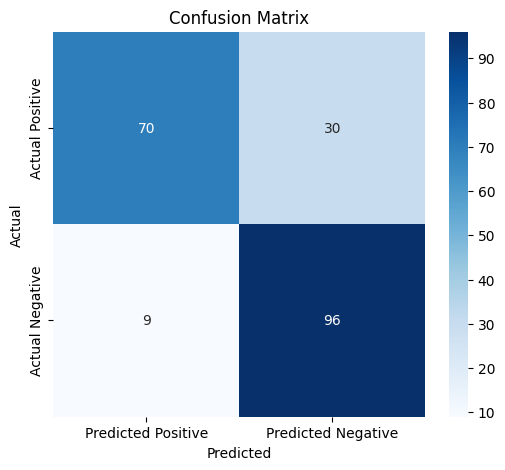

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Positive', 'Predicted Negative'], yticklabels=['Actual Positive', 'Actual Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

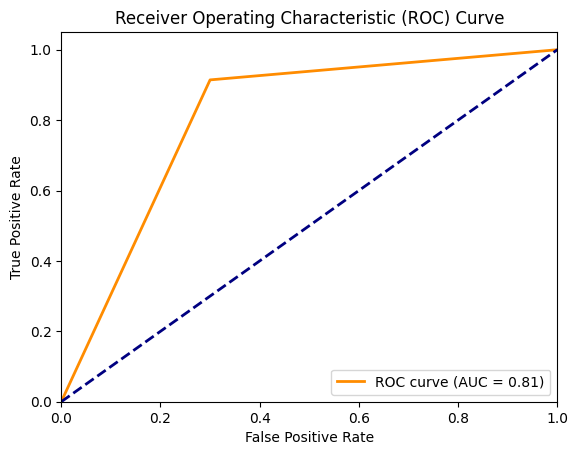

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

MAE: 0.19
MSE: 0.19
RMSE: 0.44


In [ ]:
def custom_accuracy(y_test, y_pred):
    return np.mean(y_test == y_pred)

accuracy = custom_accuracy(y_test, y_pred)
print(f'Custom Accuracy: {accuracy:.2f}')

Custom Accuracy: 0.81


In [ ]:
#using random forest identifier
model1 = RandomForestClassifier(n_estimators=100, random_state=42)

# cross validation using 5 sets
scores = cross_val_score(model1, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f'Cross-validation scores: {scores}')
print(f'Mean accuracy: {scores.mean():.2f}')
print(f'Standard deviation: {scores.std():.2f}')

Cross-validation scores: [0.95121951 0.98780488 0.98780488 0.98170732 1.        ]
Mean accuracy: 0.98
Standard deviation: 0.02


In [ ]:
#training the model on scaled data
model1.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_1 = model1.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_1)
print(f"Test accuracy: {accuracy}")

Test accuracy: 1.0


Confusion Matrix:
[[100   0]
 [  0 105]]


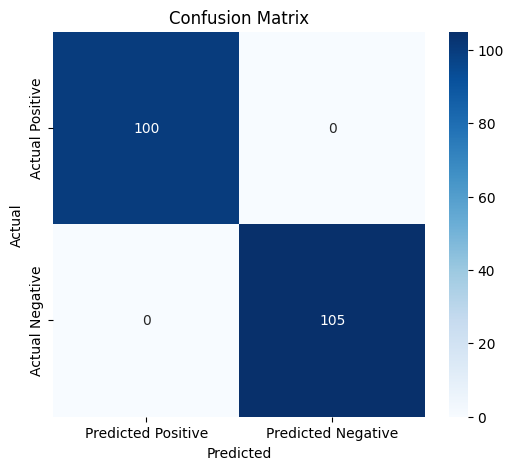

In [ ]:
cm = confusion_matrix(y_test, y_pred_1)
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Positive', 'Predicted Negative'], yticklabels=['Actual Positive', 'Actual Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Model is **Overfit**

In [ ]:
print(model1.feature_importances_)

[0.09128535 0.026682   0.14209365 0.06776455 0.0777713  0.01079045
 0.02043762 0.1173491  0.07370723 0.11263412 0.04871071 0.11484386
 0.09593007]


# **Report on Heart Disease Prediction using Machine Learning**
Logistic Regression and Random Forest Classifier.

**Methodology:**

**Data:** Loads heart disease data (heart.csv), splits it into training and testing sets, and scales the features.

***Logistic Regression:*** Trains a logistic regression model, performs cross-validation, evaluates performance using various metrics (accuracy, precision, recall, F1-score, ROC curve), and visualizes results.

**Random Forest:** Trains a random forest classifier, performs cross-validation, evaluates performance, and identifies important features.
Observations:

Logistic Regression provides a generalized model with good accuracy.
Random Forest might be overfitting, requiring further investigation.